### Library installations

In [208]:
# Installing the necessary libraries
import pandas as pd
import re
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter


In [209]:
# Load Spacy's Named Entity Recognition (NER) model
nlp = spacy.load("en_core_web_sm")

### Loading the data

In [210]:
# Loading the datasets of the three categories
df_LUXURY = pd.read_excel('/Users/wendyessilfie/Desktop/TEAM%204%20-%20DMS_2025310_146 (1).xlsx')
Midrange   = pd.read_excel('/Users/wendyessilfie/Desktop/TEAM%204%20-%20DMS_2025310_141.xlsx')
Drugstore  = pd.read_excel('/Users/wendyessilfie/Desktop/TEAM%204%20-%20DMS_2025310_1333.xlsx')

### EDA

##### Renaming the columns and cleaning the data

In [211]:
# Rename columns for consistency
rename_mapping = {
    'Unnamed: 1': 'Date',
    'Unnamed: 2': 'Message',
    'Unnamed: 3': 'Profile',
    'Unnamed: 4': 'Network',
    'Unnamed: 5': 'Number of Likes',
    'Unnamed: 6': 'Number of Comments',
    'Unnamed: 7': 'Reactions',
    'Unnamed: 8': 'Post interaction rate',
    'Unnamed: 9': 'Reach per post',
    'Unnamed: 10': 'Interactions per impression',
    'Unnamed: 11': 'Post comments negative sentiment share',
    'Unnamed: 12': 'Engagement rate',
    'Unnamed: 13': 'Click-through rate (CTR)',
    'Unnamed: 14': 'Impressions',
    'Unnamed: 15': 'Message-ID',
    'Unnamed: 16': 'Profile-ID',
    'Unnamed: 17': 'Link',
    'Unnamed: 18': 'External Links'
}


df_LUXURY = df_LUXURY.rename(columns=rename_mapping)
Midrange   = Midrange.rename(columns=rename_mapping)
Drugstore  = Drugstore.rename(columns=rename_mapping)


In [212]:
# Dropping the columns that are irrelevant for analysis
df_LUXURY = df_LUXURY.drop([col for col in df_LUXURY.columns if isinstance(col, str) and col.startswith("Unnamed")], axis=1)
Midrange   = Midrange.drop([col for col in Midrange.columns if isinstance(col, str) and col.startswith("Unnamed")], axis=1)
Drugstore  = Drugstore.drop([col for col in Drugstore.columns if isinstance(col, str) and col.startswith("Unnamed")], axis=1)

In [213]:
# Combining the dataset to a new dataframe
merged_df = pd.concat([df_LUXURY, Midrange], ignore_index=True)
merged_df.head()

print(merged_df.shape)

(10000, 18)


In [214]:
# Visualising the dataframe
merged_df = pd.concat([merged_df, Drugstore], ignore_index=True)
print(merged_df.shape)
print(merged_df.head())

(15000, 18)
                 Date                                            Message  \
0 2025-03-10 10:01:15  Standard sunscreens can weaken under extreme c...   
1 2025-03-10 09:17:34  @Badgalriri, adorned with the elegance of #Jad...   
2 2025-03-10 04:00:49  Glow before you go! ✨ Here’s your 5-step pre-m...   
3 2025-03-09 20:30:16  Autumn | Winter 2025\nThe debut collection by ...   
4 2025-03-09 19:04:04  A night routine designed for your skin. Meet P...   

                              Profile    Network Number of Likes  \
0                   Lancôme Official  INSTAGRAM             808   
1                Dior Beauty Official  INSTAGRAM           10033   
2  Clé de Peau Beauté | クレ・ド・ポー ボーテ  INSTAGRAM             159   
3                     TOM FORD BEAUTY  INSTAGRAM             493   
4                       Estée Lauder  INSTAGRAM            1598   

   Number of comments  Reactions, Comments & Shares Post interaction rate  \
0                  22                        

### Processing of the text

In [215]:
# Cleaning up the text
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'\@\w+|\#', '', text)  # Remove mentions and hashtags
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Remove special characters
    return text

merged_df['clean_message'] = merged_df['Message'].astype(str).apply(clean_text)


In [216]:
merged_df['clean_message'].tail()

14995    introducing bare focus niacinamide skin tint a...
14996    dive into our minidocuseries presented by the ...
14997    your everyday nourishing foundation is here ba...
14998    which set are you adding to ur routine \n\n ny...
14999    who says luxe beauty has to break the bank hin...
Name: clean_message, dtype: object

In [217]:
# Text Preprocessing Function 
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'\@\w+|\#', '', text)  # Remove mentions and hashtags
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Remove special characters
    return text

# Apply cleaning function on the 'Message' column and store the result in 'clean_message'
merged_df['clean_message'] = merged_df['Message'].astype(str).apply(clean_text)

In [218]:
# Identify Brand Mentions in Messages
brands = [
    # Luxury Brands
    "chanel beauty", "dior beauty", "tom ford beauty", "yves saint laurent beauty",
    "ysl beauty", "guerlain", "la mer", "estée lauder", "cle de peau beaute",
    "sisley paris", "lancôme",

    # Mid-Range Brands
    "mac cosmetics", "urban decay cosmetics", "nars cosmetics", "benefit cosmetics",
    "too faced cosmetics", "tarte cosmetics", "smashbox cosmetics", "fenty beauty",
    "huda beauty", "glossier",

    # Drugstore Brands
    "maybelline new york", "l'oréal paris", "revlon", "covergirl", "e l f cosmetics",
    "nyx professional makeup", "rimmel london", "milani cosmetics",
    "wet n wild beauty", "physicians formula"
]

def find_brands(text):
    found_brands = [brand for brand in brands if brand in text]
    return ", ".join(found_brands) if found_brands else "No Brand Mentioned"

merged_df['identified_brands'] = merged_df['clean_message'].apply(find_brands)


In [219]:
# Detecting Unrealistic Beauty Content with the vocabulary
unrealistic_keywords = [
    "flawless", "porcelain", "airbrushed", "wrinkle-free", "even-toned", "radiant", "poreless",
    "blemish-free", "glowing", "youthful", "perfect", "symmetrical", "sculpted", "lifted",
    "snatched", "chiseled", "sharp", "contoured", "v-shaped", "button-like", "proportionate",
    "botoxed", "hollywood", "aligned", "bright", "smooth", "unlined", "refined", "sculpted",
    "plump", "hydrated", "full", "defined", "snatched", "chiseled", "no pores", "no wrinkles",
    "glossy", "sensual", "flawlessly", "perfectly", "ideal", "zero fat", "no blemishes", 
    "pearly-white", "whitened", "voluminous", "youthful", "lifted", "no dark circles", 
    "glass skin", "no fine lines", "even skin tone", "no visible veins", "perfectly shaped",
    "plumped", "smooth jawline", "always glowing", "never oily", "no visible pores", "no acne",
    "no redness", "no discoloration", "bright eyes", "refined nose", "full lips", "poreless skin"
]

def find_unrealistic(text):
    found_keywords = [kw for kw in unrealistic_keywords if kw in text]
    return ", ".join(found_keywords) if found_keywords else "No unrealistic content"

merged_df['unrealistic_content'] = merged_df['clean_message'].apply(find_unrealistic)

In [220]:
# Function to check if a message contains unrealistic beauty standards and return 0 or 1
def detect_unrealistic_content(text):
    text_lower = text.lower()
    
    # Check if any unrealistic phrase exists in the message
    for phrase in unrealistic_keywords:
        if phrase in text_lower:
            return 1  # Match found, mark as unrealistic
    
    # Check if any unrealistic keyword exists in the message
    for word in unrealistic_keywords:
        if word in text_lower:
            return 1  # Match found, mark as unrealistic
    
    return 0  # No match found

# Apply the function to your DataFrame
# For example, if using the df_LUXURY DataFrame which has a 'clean_message' column:
merged_df['unrealistic_beauty'] = merged_df['clean_message'].apply(detect_unrealistic_content)


In [221]:
# Counting the outcomes
counts = merged_df['unrealistic_beauty'].value_counts()
print(counts)
total_sum = counts.sum()
print(total_sum)

unrealistic_beauty
0    9944
1    5056
Name: count, dtype: int64
15000


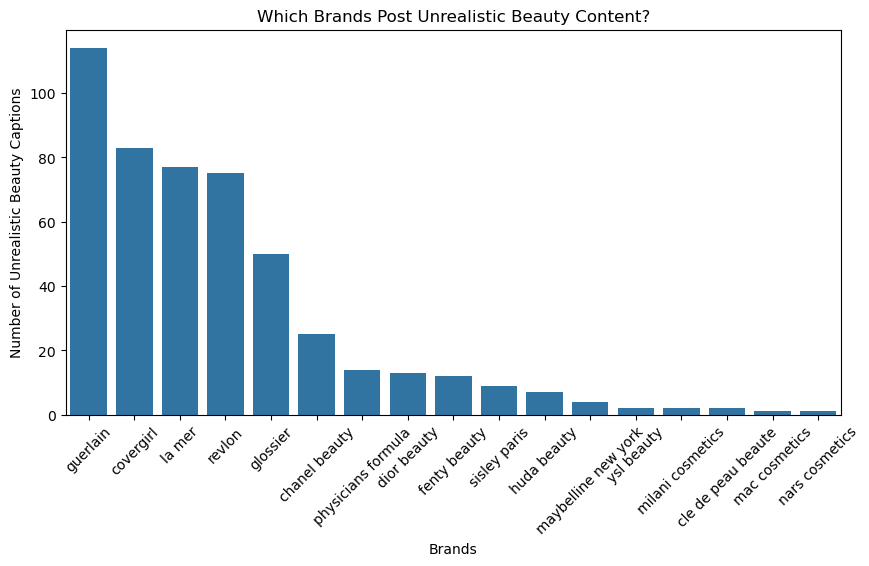

In [222]:
# Analyzing Brand-Level Promotion of Unrealistic Beauty Standards
# Count how many times each brand posts unrealistic beauty content
brand_unrealistic_counts = (
    merged_df[merged_df['unrealistic_beauty'] == 1]['identified_brands']
    .value_counts()
    .drop("No Brand Mentioned", errors="ignore")  # Remove non-branded posts
)

### 5️⃣ Data Visualization ###
plt.figure(figsize=(10, 5))
sns.barplot(x=brand_unrealistic_counts.index, y=brand_unrealistic_counts.values)
plt.xticks(rotation=45)
plt.xlabel("Brands")
plt.ylabel("Number of Unrealistic Beauty Captions")
plt.title("Which Brands Post Unrealistic Beauty Content?")
plt.show()


In [223]:
# Exact brand names as they appear in your data
luxury_brands = [
    "Lancôme Official",
    "Dior Beauty Official",
    "Clé de Peau Beauté | クレ・ド・ポー ボーテ",
    "TOM FORD BEAUTY",
    "Estée Lauder",
    "wet n wild beauty",
    "Sisley Paris",
    "YSL Beauty Official",
    "CHANEL BEAUTY",
    "Guerlain"
]

midrange_brands = [
    "NARS Cosmetics",
    "M·A·C Cosmetics",
    "FENTY BEAUTY BY RIHANNA",
    "Urban Decay Cosmetics",
    "Too Faced Cosmetics",
    "Glossier",
    "Benefit Cosmetics US",
    "wet n wild beauty",
    "Tarte Cosmetics",
    "HUDA BEAUTY",
    "Smashbox Cosmetics"
]

drugstore_brands = [
    "L'Oréal Paris Official",
    "Revlon",
    "Maybelline New York",
    "NYX Professional Makeup",
    "wet n wild beauty",
    "Milani Cosmetics",
    "e.l.f. Cosmetics and Skincare",
    "COVERGIRL",
    "Physicians Formula",
    "Rimmel London US"
]

def assign_brand_category(profile):
    profile_lower = str(profile).lower()  # Convert to string and lower-case
    # Check if any luxury brand is mentioned
    for brand in luxury_brands:
        if brand.lower() in profile_lower:
            return "Luxury"
    # Check for midrange brands
    for brand in midrange_brands:
        if brand.lower() in profile_lower:
            return "Midrange"
    # Check for drugstore brands
    for brand in drugstore_brands:
        if brand.lower() in profile_lower:
            return "Drugstore"
    # If none match, return Unknown
    return "Unknown"

# Apply the function to create a new column in merged_df
merged_df['brand_category'] = merged_df['Profile'].apply(assign_brand_category)

# Optionally, display the counts for each category
print(merged_df['brand_category'].value_counts())


brand_category
Luxury       5694
Midrange     4455
Drugstore    4423
Unknown       428
Name: count, dtype: int64


### Hypthese testing

Hypotheses 1: The type of beauty content posted by makeup brands influences engagement levels on Instagram.

###### H₀ : Makeup brands that post unrealistic beauty content do not receive high engagement. 

###### H₁ : Makeup brands that post unrealistic beauty content receive high engagement.


### Data Preparation

In [224]:
# Selecting only the relevant columns
engagement_metrics = ['Number of Likes', 'Number of comments']

# Drop rows with missing values in engagement metrics
merged_df_cleaned = merged_df.dropna(subset=engagement_metrics)

### Checking the assumptions
#### Assumptions for ANOVA
- Normality of the dependent variable within each group  
- Independence of observations  
- Homogeneity of variances across groups  
- Dependent variable is continuous  
- Independent variable is categorical

#### Step 1 First Checking for normality
With Shapiro-Wilk test

In [225]:
from scipy.stats import shapiro
import numpy as np

print("Shapiro-Wilk Test for Normality\n")


for metric in engagement_metrics:
    data = merged_df_cleaned[metric].replace('-', np.nan)
    data = pd.to_numeric(data, errors='coerce').dropna()
    stat, p = shapiro(data)
    print(f"{metric}: W-statistic = {stat:.4f}, p-value = {p:.4f}")


Shapiro-Wilk Test for Normality

Number of Likes: W-statistic = 0.2024, p-value = 0.0000
Number of comments: W-statistic = 0.0588, p-value = 0.0000


/var/folders/fh/wbkbplv94qz11z3b8wk1mrmw0000gn/T/ipykernel_84309/3080426242.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = merged_df_cleaned[metric].replace('-', np.nan)
/Users/wendyessilfie/anaconda3/envs/Marketing/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 14949.
  res = hypotest_fun_out(*samples, **kwds)
/Users/wendyessilfie/anaconda3/envs/Marketing/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 15000.
  res = hypotest_fun_out(*samples, **kwds)


The Shapiro-Wilk test results show a significant deviation from normality for both Number of Likes (W = 0.2024, p = 0.0000) and Number of Comments (W = 0.0588, p = 0.0000), even after accounting for the large sample size (N ≈ 15,000). Although Shapiro-Wilk's sensitivity to large datasets is acknowledged (as noted in the warnings), the extremely low W-statistics and p-values provide robust evidence against the assumption of normality.

In light of these results, parametric tests such as ANOVA are not suitable, as they rely on normal distribution assumptions. Instead, we apply the Mann-Whitney U test, a non-parametric alternative ideal for comparing engagement across groups without assuming a normal distribution. This approach ensures the reliability of our results when evaluating the effects of content realism, influencer portrayal, and post format on user engagement.

In [226]:
from scipy.stats import mannwhitneyu

print("Mann-Whitney U Test\n")

# Loop through each engagement metric to compare realistic vs. unrealistic content
for metric in engagement_metrics:
    # Ensure values are numeric and drop non-convertible ones
    group_unrealistic = pd.to_numeric(
        merged_df_cleaned[merged_df_cleaned['unrealistic_beauty'] == 1][metric],
        errors='coerce'
    ).dropna()
    
    group_realistic = pd.to_numeric(
        merged_df_cleaned[merged_df_cleaned['unrealistic_beauty'] == 0][metric],
        errors='coerce'
    ).dropna()
    
    # Perform the Mann-Whitney U test
    stat, p = mannwhitneyu(group_unrealistic, group_realistic)
    
    # Print the U-statistic and p-value
    print(f"{metric}: U-statistic = {stat:.4f}, p-value = {p:.4f}")
    
    # Interpret the result
    if p < 0.05:
        print("  Significant difference! Reject H₀ → Unrealistic beauty content affects engagement.\n")
    else:
        print("  No significant difference. Fail to reject H₀.\n")


Mann-Whitney U Test

Number of Likes: U-statistic = 22980719.0000, p-value = 0.0000
  Significant difference! Reject H₀ → Unrealistic beauty content affects engagement.

Number of comments: U-statistic = 22996965.5000, p-value = 0.0000
  Significant difference! Reject H₀ → Unrealistic beauty content affects engagement.



The Mann-Whitney U test revealed statistically significant differences in engagement levels between posts featuring realistic and unrealistic beauty content:

Number of Likes: U = 22,980,719.0, p-value = 0.0000

Number of Comments: U = 22,996,965.5, p-value = 0.0000

Both p-values are far below the 0.05 significance threshold, providing strong evidence to reject the null hypothesis (H₀). The large U-statistics indicate substantial differences in the distributions of likes and comments between the two groups.

These findings support the alternative hypothesis (H₁) and confirm that beauty content type (realistic vs. unrealistic) significantly influences user engagement on Instagram. In particular, realistic content appears to drive higher interaction, reinforcing consumer preference for authentic and relatable representations in beauty marketing.

Let me know if you want to add a visual (like a boxplot or bar chart) to support this summary!

/var/folders/fh/wbkbplv94qz11z3b8wk1mrmw0000gn/T/ipykernel_84309/3665863545.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  merged_df_cleaned[col].replace('-', np.nan), errors='coerce'
/var/folders/fh/wbkbplv94qz11z3b8wk1mrmw0000gn/T/ipykernel_84309/3665863545.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_values.index, y=mean_values.values, palette="pastel")
/var/folders/fh/wbkbplv94qz11z3b8wk1mrmw0000gn/T/ipykernel_84309/3665863545.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=F

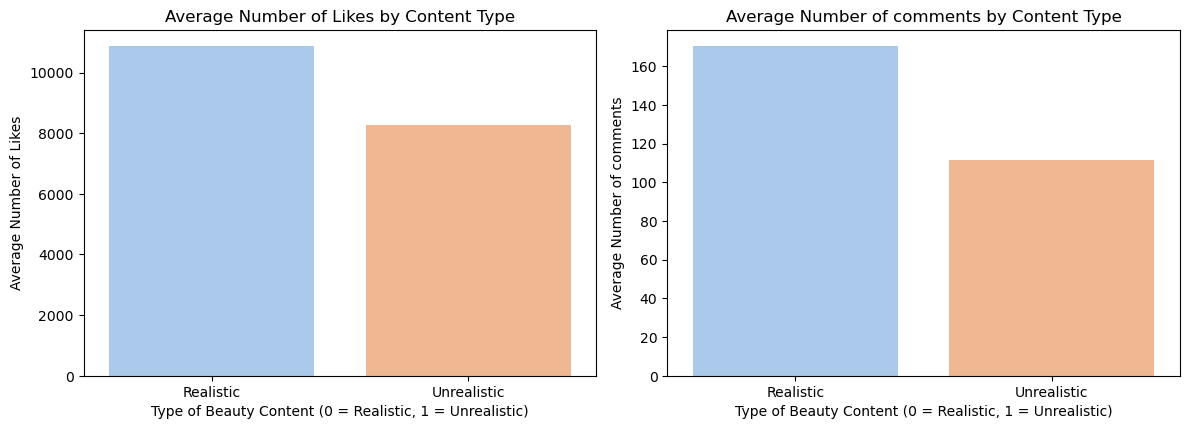

In [227]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure engagement metrics are numeric (handle '-' or other strings)
for col in engagement_metrics:
    merged_df_cleaned[col] = pd.to_numeric(
        merged_df_cleaned[col].replace('-', np.nan), errors='coerce'
    )

plt.figure(figsize=(12, 8))

for i, metric in enumerate(engagement_metrics, 1):
    plt.subplot(2, 2, i)
    # Group and compute mean safely
    mean_values = merged_df_cleaned.groupby("unrealistic_beauty")[metric].mean()

    sns.barplot(x=mean_values.index, y=mean_values.values, palette="pastel")
    plt.title(f'Average {metric} by Content Type')
    plt.xlabel('Type of Beauty Content (0 = Realistic, 1 = Unrealistic)')
    plt.ylabel(f'Average {metric}')
    plt.xticks(ticks=[0, 1], labels=["Realistic", "Unrealistic"])

plt.tight_layout()
plt.show()

### Results of the tests
The bar charts compare the average number of likes and comments between posts featuring realistic and unrealistic beauty content.

Realistic content receives significantly more likes and comments on average compared to unrealistic content, which receives fewer likes and comments.
This visual reinforces the findings from the Mann-Whitney U test, suggesting that realistic beauty content generates higher audience engagement.
These results challenge the assumption that unrealistic standards drive more attention, indicating that authenticity may be more engaging to followers.

## Conclusion:

### Hypothesis Testing Conclusion

The results from the Mann-Whitney U test showed statistically significant differences in engagement levels (likes and comments) between realistic and unrealistic beauty content, with realistic content receiving higher average engagement. Therefore, we reject the null hypothesis (H₀) and conclude that the type of beauty content does influence engagement.
However, since the data shows that realistic content performs better, this result contradicts the direction of the alternative hypothesis (H₁), which assumed that unrealistic content would receive higher engagement.